In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv("products.csv")

In [3]:
try:
    dataframe = dataframe.drop(columns=["number_of_reviews",
                       "number_of_answered_questions",
                       "average_review_rating",
                       "customers_who_bought_this_item_also_bought",
                       "items_customers_buy_after_viewing_this_item",
                       "customer_questions_and_answers",
                       "customer_reviews",
                       "sellers"])
except:
    pass
dataframe = dataframe.dropna()
dataframe["number_available_in_stock"] = dataframe["number_available_in_stock"].apply(lambda x: int(x.split()[0])) 

In [4]:
dataframe.aggregate({"number_available_in_stock": ["sum"]})

,number_available_in_stock
sum,48266


In [6]:
magazyn = {
    "A": {
        "rows": ["A", "B", "C"],
        "columns": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        "shelves": [1,2,3,4,5,6]
    },
    "B": {
        "rows": ["A", "B", "C", "D"],
        "columns": [1,2,3,4,5,6,7,8,9],
        "shelves": [1,2,3,4,5,6]
    },
    "imports": [1,2,3,4],
    "exports": [1,2,3,4,5,6],
    "shelf_capacity": 100
}

In [7]:
dataframe["amazon_category_and_sub_category"] = dataframe["amazon_category_and_sub_category"].apply(lambda x: x.split('>')[0].strip()) 

In [8]:
main_cat = []
for index, row in dataframe.iterrows():
    main_cat.append(row["amazon_category_and_sub_category"])
main_cat = set(main_cat)
len(main_cat)

35

In [9]:
dataframe = dataframe.drop(index = dataframe.query("amazon_category_and_sub_category == 'Sex & Sensuality'").index.values[0])

In [10]:
dataframe.query("amazon_category_and_sub_category == 'Men'")["description"].values

array(['Colour Name:white Shirt'], dtype=object)

In [11]:
perm_list = []
for i in ["A", "B"]:
    for j in magazyn[i]["columns"]:
        for k in magazyn[i]["rows"]:
            for l in magazyn[i]["shelves"]:
                ident = "{}{}.{}.{}".format(i,k,j,l)
                perm_list.append(ident)
len(perm_list)

486

In [12]:
location_id = []
#280
#Location code {A}{B}.{C}.{D}:{E}
# {A} - magazine code: A/B
# {B} - row: ABCD
# {C} - column: 1-15
# {D} - shelf: 1-6
# {E} - count: int
count = 0
jump = 9
sorted_df = dataframe.sort_values(by=["amazon_category_and_sub_category"])
iterator = 0
prev_cat = None

for index, row in sorted_df.iterrows():
    if prev_cat is None:
        prev_cat = row["amazon_category_and_sub_category"]
    else:
        prev_cat = cat
    cat = row["amazon_category_and_sub_category"]
    num = row["number_available_in_stock"]
    if prev_cat != cat:
        count+=9
    if count >= 100:
        count-=100
        iterator+=1
    count+=num
    if count >= 100:
        count-=100
        iterator+=1
        location_id.append("{}:{}, {}:{}".format(perm_list[iterator-1],num-count,perm_list[iterator],count))
    else:
        location_id.append("{}:{}".format(perm_list[iterator],num))
dataframe = sorted_df.assign(location=location_id)

In [13]:
dataframe = dataframe.set_index("uniq_id")

In [14]:
total_value = 0
for index, row in dataframe.iterrows():
    total_value += float("".join(row["price"][1:].split(",")))*int(row["number_available_in_stock"])
total_value

917618.7899999879

In [15]:
dataframe.to_csv("resources.csv")

In [4]:
dataframe

NameError: name 'dataframe' is not defined

In [17]:
#Generowanie zamówień
number_of_orders = 200
columns = ["order_id", "name", "surname", "adress", "delivery_option", "date_placed", "number_of_items_bought", "items_ids"]
delivery_options = ["postal_service", "DHL", "InPost", "UPS", "TNT", "DPD"]
n_delivery_options = len(delivery_options)
max_items_bought = 8
names = []
with open("first_names.txt") as file:
    for line in file:
        names.append(line[:-1])
n_names = len(names)
last_names = []
with open("last_names.txt") as file:
    for line in file:
        last_names.append(line[:-1])
n_last_names = len(last_names)
adressess = []
with open("adresses.txt") as file:
    for line in file:
        adressess.append(line[:-1])
n_adressess = len(adressess)
dataframe_len = len(dataframe)

In [33]:
from datetime import datetime

order_id = []
name = []
surname = []
adress = []
delivery = []
no_items = []
items = []
dates = []

for i in range(number_of_orders):
    order_id.append(i+1)
    name.append(names[np.random.randint(0,n_names)])
    surname.append(last_names[np.random.randint(0,n_last_names)])
    adress.append(adressess[np.random.randint(0,n_adressess)])
    delivery.append(delivery_options[np.random.randint(0,n_delivery_options)])
    no_items.append(np.random.randint(1,max_items_bought))
    ids = {}
    for i in range(no_items[-1]):
        item_no = np.random.randint(0,dataframe_len)
        maxim = dataframe.iloc[item_no]["number_available_in_stock"]
        if maxim > 1:
            n = np.random.randint(1,maxim)
            nx = dataframe.iloc[item_no].name 
            ids[nx] = np.random.randint(1,maxim)
            dataframe.loc[nx,"number_available_in_stock"] -= n
        elif maxim != 0:
            nx = dataframe.iloc[item_no].name 
            ids[nx] = 1
            dataframe.loc[nx,"number_available_in_stock"] -= 1
        else:
            no_items -= 1
    items.append(ids)
    date_placed = datetime(2019,
                          np.random.randint(8,11),
                          np.random.randint(1,28),
                          np.random.randint(0,23),
                          np.random.randint(0,60),
                          np.random.randint(0,60),
                          0)
    dates.append(date_placed)

order_dataframe = pd.DataFrame({"order_id": order_id,
                               "name": name,
                               "surname": surname,
                               "adress": adress,
                               "delivery_option": delivery,
                                "date_placed": dates,
                               "number_of_items_bought": no_items,
                                "items_ids": items})
order_dataframe = order_dataframe.set_index("order_id")

In [34]:
order_dataframe

,name,surname,adress,delivery_option,date_placed,number_of_items_bought,items_ids
order_id,,,,,,,
1,Teriann,Martinez-Ramos,"2473 Hackworth Road, Adamsville AL 35005",TNT,2019-10-21 14:02:36,6,"{'c85169bcc88f9ee8e83e2899afae3ba6': 4, 'b8794..."
2,Phaedra,Chisholm,"591 Memorial Dr, Chicopee MA 1020",InPost,2019-10-12 11:32:28,6,"{'4352af3fd4a09576f6aa685d0102e90b': 2, 'a19eb..."
3,Toni,Pineda,"11610 Memorial Pkwy South, Huntsville AL 35803",postal_service,2019-08-18 11:07:55,7,"{'8486053c4373e72beda416cc2e426ad7': 3, '4d72b..."
4,Roz,Salisbury,"1470 S Washington St, North Attleboro MA 2760",postal_service,2019-09-17 06:09:14,5,"{'f92979bde86865523f169502d96ed704': 5, 'e706d..."
5,Gretchen,Rose,"501 Willow Lane, Greenville AL 36037",UPS,2019-08-04 14:45:11,1,{'9f72098cc92a7ab006ec9a78071b622e': 1}
...,...,...,...,...,...,...,...
196,Cherish,Spaccarelli,"506 State Road, North Dartmouth MA 2747",UPS,2019-08-25 05:27:04,3,"{'0bf66a71e8ea3d59e1e61086d54f602c': 1, '8e7df..."
197,Zulema,Doweiko,"7855 Moffett Rd, Semmes AL 36575",TNT,2019-08-13 14:37:22,4,"{'2b60513e29f6de52ac8ef9bd9f95f2f6': 8, 'bc3c6..."
198,Cassandry,Sprott,"1000 State Route 36, Hornell NY 14843",TNT,2019-09-08 13:22:14,3,"{'a4c99461e22ed0ed672c064c99461cb4': 3, '7d10a..."


In [35]:
order_dataframe.to_csv("orders.csv")

In [1]:
#Ograniczenia
#Liczba obsłużonych osób maks: 5
#Obłożenie z najkrótszymi drogami
#Algorytmy przybliżone:
#Wyznaczenie dobrej trasy do ustalonego pakietu - symulowane wyżażanie.
#Algorytm mieszania przydziałem zleceń.

In [1]:
import networkx as nx

graph = nx.Graph()

with open("Graf.txt") as file:
    for line in file:
        ident, rest = line.split(":")
        ident = int(ident[1:].strip())
        if rest.strip()[-1] == ";":
            rest = rest.strip()[:-1]
        rest = rest.split(";")
        idents = []
        weights = []
        for cont in rest:
            iden_2, weight = cont.split("x")
            iden_2 = int(iden_2.strip())
            weight = int(weight.strip())
            idents.append(iden_2)
            weights.append(weight)
        graph.add_weighted_edges_from([(ident, idents[i], weights[i]) for i in range(len(idents))])

<IPython.core.display.Javascript object>


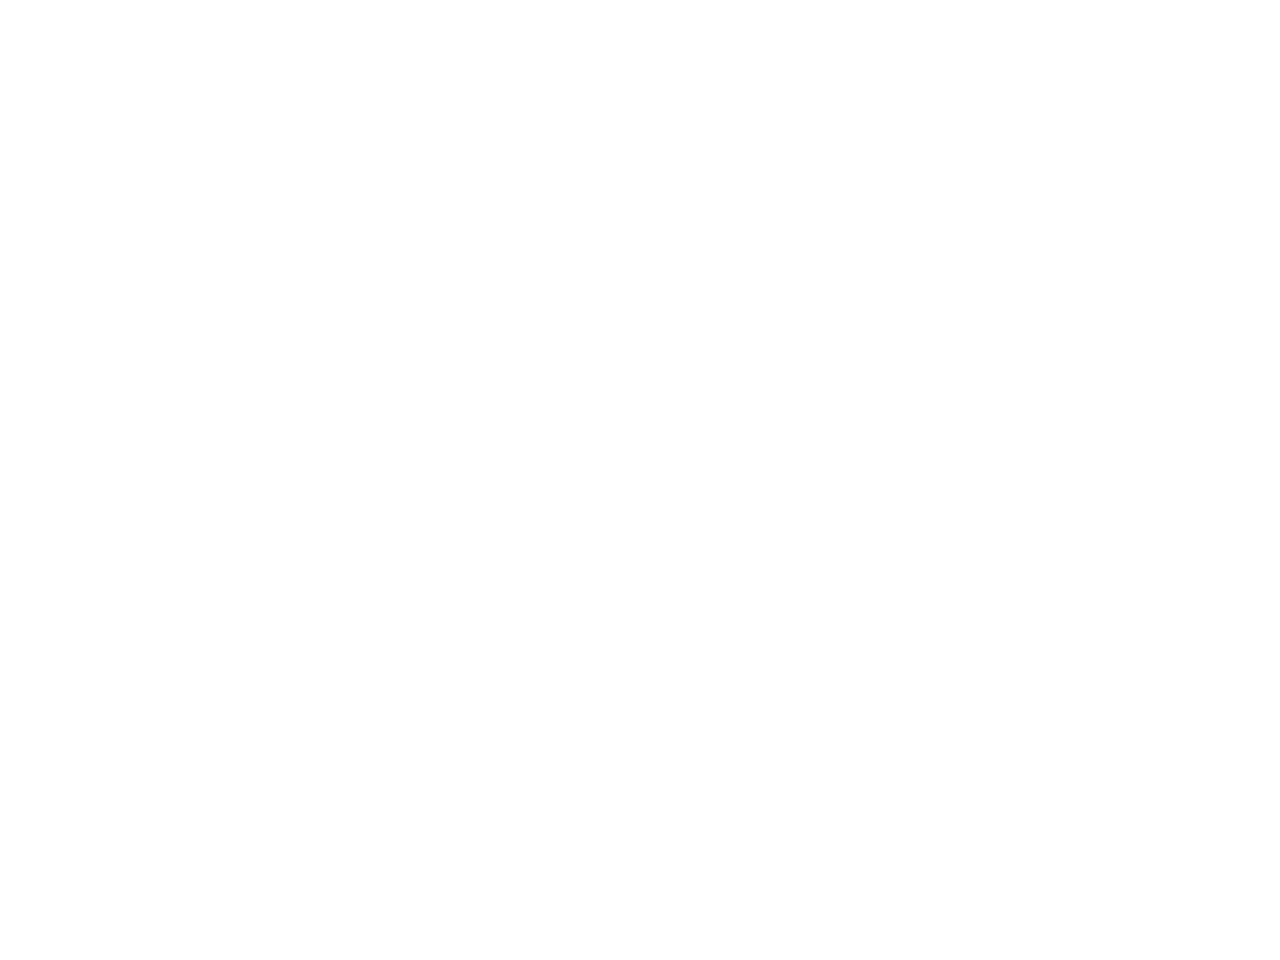

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.subplot(121)
nx.draw(graph, with_labels=True, font_weight='bold')

In [3]:
def get_path_length(graph, path):
    cost = 0
    for i in range(len(path)-1):
        cost += graph[path[i]][path[i+1]]["weight"]
    return cost

path = nx.astar_path(graph, 204, 205)
get_path_length(graph,path)

25

In [4]:
import random
import copy
import math


def get_whole_pi(pi):
    return [91] + pi + [203]

def func_cel(pi, graph):
    pi_whole = get_whole_pi(pi)
    cost = 0
    for i in range(len(pi_whole)-1):
        cost += get_path_length(graph, nx.astar_path(graph, pi_whole[i], pi_whole[i+1]))
    return cost

def choose_random_neighb(pi, mode='interchange'):
    pi_new = copy.deepcopy(pi)
    if mode == 'interchange':
        idx1, idx2 = random.choices(range(len(pi)),k=2)
        temp = pi_new[idx1]
        pi_new[idx1] = pi_new[idx2]
        pi_new[idx2] = temp
    if mode == 'insert':
        idx1, idx2 = random.choices(range(len(pi)),k=2)
        pi_new.insert(idx1, pi_new[idx2])
        if idx2 > idx1:
            pi_new.pop(idx2+1)
        else:
            pi_new.pop(idx2)
    return pi_new
    
def anneal(T0, Tk, pi, func_cel, random_neighb, lam = 0.9995, early_stopping = 50, printing = False):
    T = T0
    pi_star = copy.deepcopy(pi)
    loss_prev = func_cel(pi_star)
    steps = 0
    while(T >= Tk):
        pi_prim = random_neighb(pi)
        loss = func_cel(pi_star)
        if func_cel(pi_prim) < loss:
            pi_star = copy.deepcopy(pi_prim)
        if func_cel(pi_prim) <= func_cel(pi): 
            pi = copy.deepcopy(pi_prim)
        else:
            delta = func_cel(pi_prim) - func_cel(pi)
            p = math.exp(-delta/T)
            z = random.random()
            if z <= p:
                pi = copy.deepcopy(pi_prim)
        if printing:
            print("{}: {}".format(T,loss))
            
        if loss_prev == loss:
            steps += 1
        else:
            steps = 0
        if steps >= early_stopping:
            break
        loss_prev = loss
        T = lam*T
    return pi_star

In [8]:
pi = [11, 31, 144, 15, 157]
optimal = anneal(1000,500, pi, lambda x: func_cel(x,graph), lambda x: choose_random_neighb(x, mode='interchange'),early_stopping = 100, printing = True)

1000: 3925
999.5: 3665
999.00025: 3665
998.5007498750001: 3665
998.0014995000627: 3665
997.5024987503127: 3665
997.0037475009376: 3665
996.5052456271872: 3620
996.0069930043736: 3620
995.5089895078714: 3620
995.0112350131176: 3620
994.5137293956111: 3620
994.0164725309133: 3620
993.519464294648: 3620
993.0227045625006: 3620
992.5261932102194: 3620
992.0299301136143: 3620
991.5339151485576: 3620
991.0381481909834: 3620
990.542629116888: 3620
990.0473578023295: 3620
989.5523341234284: 3620
989.0575579563667: 3620
988.5630291773886: 3015
988.0687476627999: 3015
987.5747132889685: 3015
987.080925932324: 3015
986.587385469358: 3015
986.0940917766234: 3015
985.6010447307351: 3015
985.1082442083698: 2725
984.6156900862657: 2725
984.1233822412225: 2725
983.631320550102: 2725
983.139504889827: 2725
982.6479351373821: 2725
982.1566111698135: 2725
981.6655328642286: 2725
981.1747000977965: 2725
980.6841127477477: 2725
980.1937706913739: 2725
979.7036738060282: 2725
979.2138219691252: 2545
978.724

In [9]:
%matplotlib notebook
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt

def img2graph_dict(filename):
    i2gdict = {}
    with open(filename, mode="r") as file:
        for line in file:
            idx, rest = line.strip().strip(";").split(":")
            idx = int(idx)
            x, y = rest.split(",")
            x = int(x)
            y = int(y)
            i2gdict[idx] = (x,y)
    return i2gdict

def get_full_path(graph, solution):
    full_path = []
    for i in range(len(solution)-1):
        full_path+=nx.astar_path(graph, solution[i], solution[i+1])
    return full_path

def draw_solution(image, solution, graph, i2gdict):
    full_path = get_full_path(graph, solution)
    xs = [i2gdict[node][0] for node in full_path]
    ys = [i2gdict[node][1] for node in full_path]
    plt.imshow(image)
    plt.plot(xs,ys)
    plt.show()
    

<IPython.core.display.Javascript object>


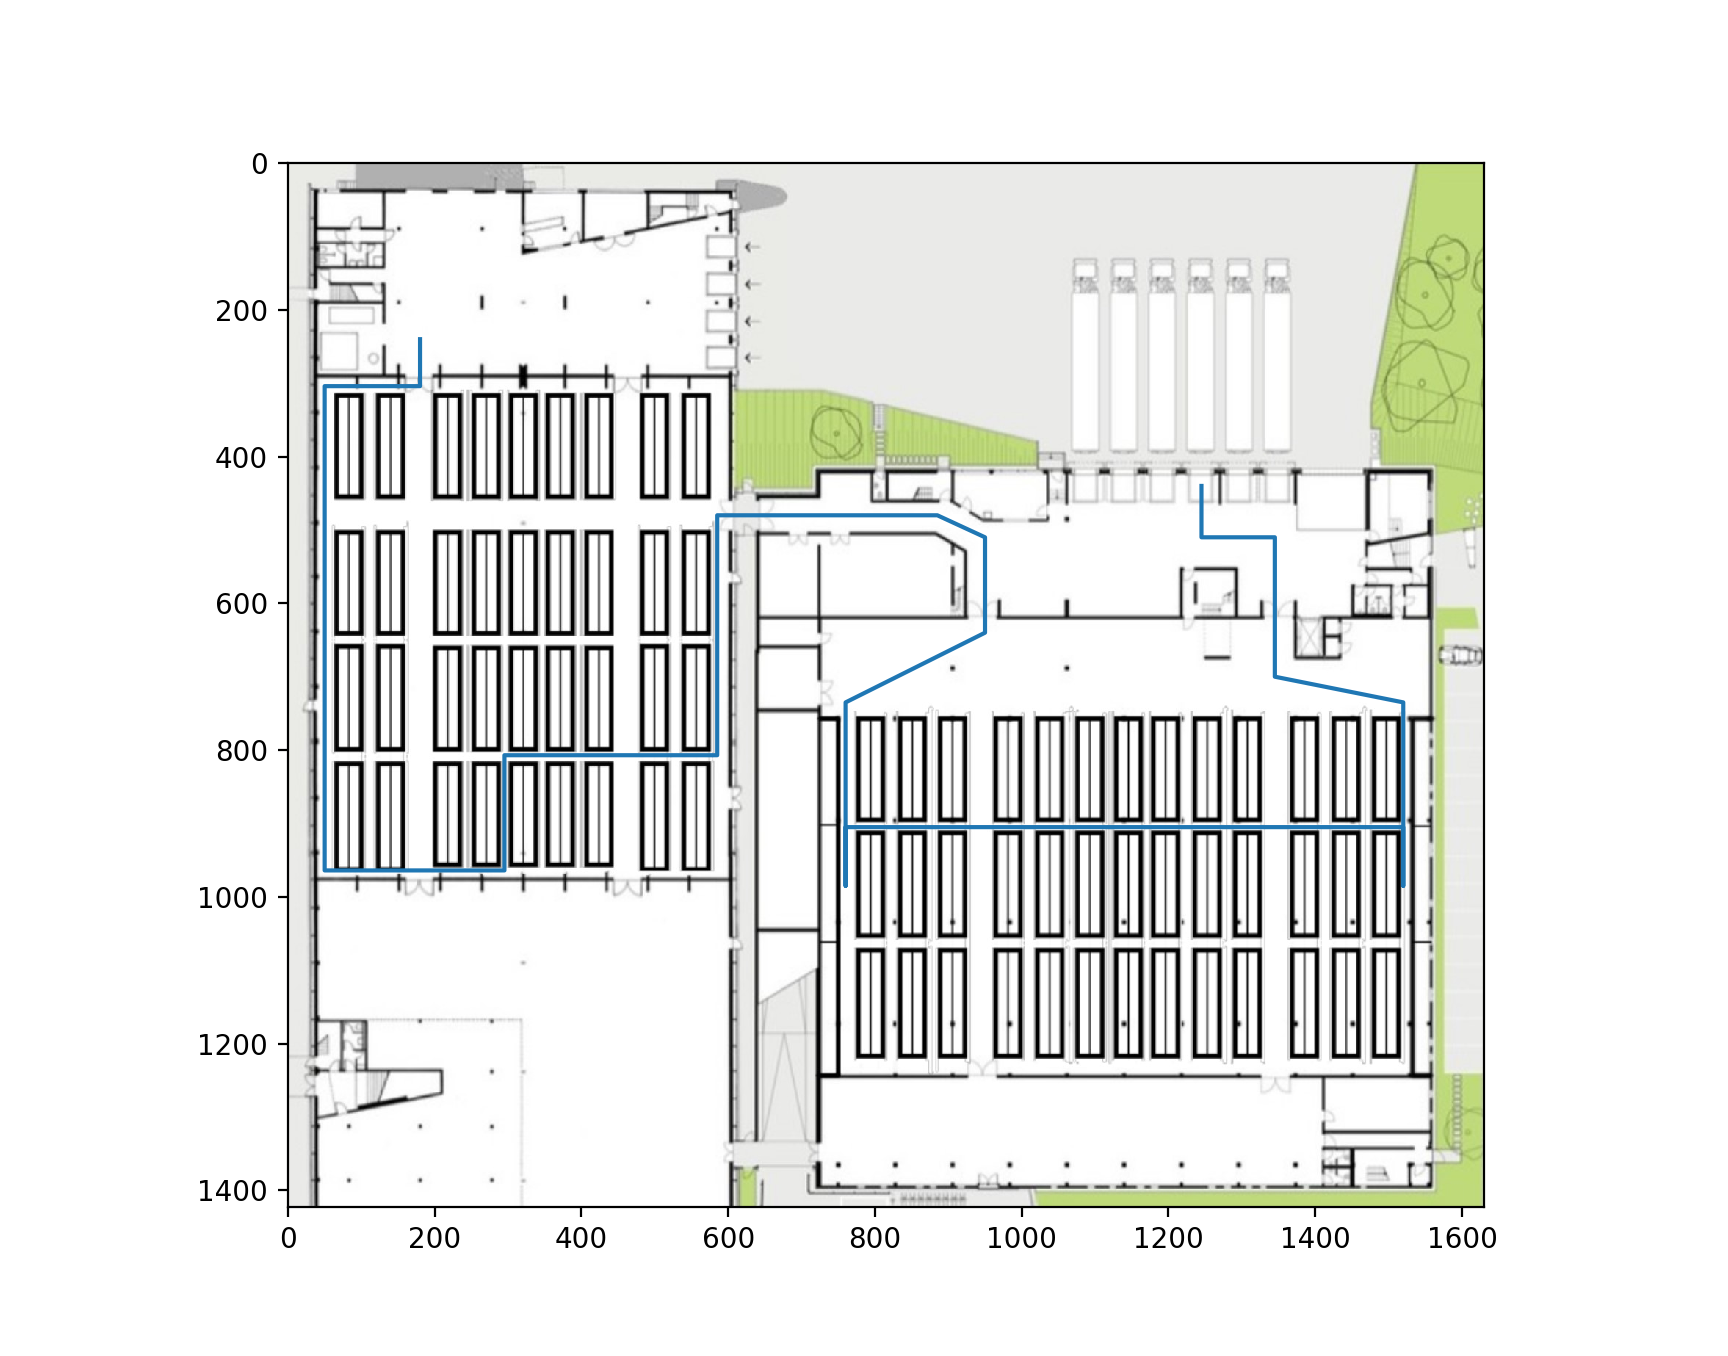

In [10]:
img = Image.open("def.jpg")
draw_solution(img, get_whole_pi(optimal), graph, img2graph_dict("graf2img.txt"))

Lista zamówień
Reprezentacja jako 0 1 2 3 4 0 5 6 7 8 0 ... dla 0 jako kolejny pracownik

In [1]:
import pandas as pd

dataframe = pd.read_csv("resources.csv")
dataframe.set_index("uniq_id")

,product_name,manufacturer,price,number_available_in_stock,amazon_category_and_sub_category,description,product_information,product_description,location
uniq_id,,,,,,,,,
aeb6e227fbc4993f985fd496c5ac78a1,"Royal Loom Band Kit, 600 Rainbow Loom Bandz + ...",Royal Loom,£3.49,2,Arts & Crafts,The Royal Loom Kit has it all . Allowing for h...,Technical Details Item Weight204 g Product Dim...,The Royal Loom Kit has it all . Allowing for h...,AA.1.1:2
aa76f0f4291de459f1ff9839a727b3b1,12 Red Glitter Cake Candles with Holders,Cake Supplies,£1.71,8,Arts & Crafts,Pack of 12 red candles with a glitter finish. ...,Technical Details Item Weight59 g Product Dime...,Pack of 12 red candles with a glitter finish. ...,AA.1.1:8
6f06bb986269058405f89b9400d0ea4d,A4 Ivory Hammered Cardstock 300gsm - 100 Sheets,Craft,£9.99,8,Arts & Crafts,Ivory card made from quality 300gsm cardstock ...,Technical Details Item Weight1.9 Kg Product Di...,Ivory card made from quality 300gsm cardstock ...,AA.1.1:8
12099ccb8b0ad9f359e10d596be57528,Paper Projects Happy Hearts Sparkle Stickers,Paper Projects,£1.00,6,Arts & Crafts,Product Description Happy Hearts Sparkle Stick...,Technical Details Item Weight9 g Product Dimen...,Product Description Happy Hearts Sparkle Stick...,AA.1.1:6
da66010359df881439400d0d95531c3f,5Pcs Cute Cartoon Chick Shape Ballpoint Pen Fa...,HuntGold,£2.14,2,Arts & Crafts,This cute plush wolf ballpoint pen is both FUN...,Technical Details Manufacturer recommended age...,This cute plush wolf ballpoint pen is both FUN...,AA.1.1:2
...,...,...,...,...,...,...,...,...,...
2bcbd458b3756ca793cfc03227c2bec7,John Adams Leisure 45-inch Sunset Glow Pool,"45"" Sunset Glow Pool",£10.64,17,Sports Toys & Outdoor,Product Description Intex Sunset Glow pool is ...,Technical Details Item Weight1.1 Kg Product Di...,Product Description Intex Sunset Glow pool is ...,"BD.9.5:9, BD.9.6:8"
26e96b522b70dac00d7069de2f42bef2,Viskey 600 Loom Rubber Bands Bracelet Making C...,Viskey,£2.62,3,"Storage, Cleaning & Ring Sizers",Colour:Hot Pink You can Loom bracelet or other...,Technical Details Brand Viskey Model NumberVis...,Colour:Hot Pink You can Loom bracelet or other...,BD.9.6:3
aaf0f91751025f76b2bdde0121400fa9,"Nestlé Animal Bar x 4 (Pack of 9, Total 36 Bars)",Nestlé,£8.01,2,"Sweets, Chocolate & Gum",Flavour Name:Milk Chocolate | Size Name:36 B...,Technical Details Expand General Information P...,Flavour Name:Milk Chocolate | Size Name:36 B...,BD.9.6:2


In [15]:
import networkx as nx
import pandas as pd

def load_mapping(filename):
    order2graph = {}
    with open(filename, "r") as file:
        for line in file:
            ordp, node = line.strip().split(":")
            ordp = ordp.strip()
            node = int(node.strip())
            order2graph[ordp] = node
    return order2graph

def load_graph(filename):
    graph = nx.Graph()

    with open(filename) as file:
        for line in file:
            ident, rest = line.split(":")
            ident = int(ident[1:].strip())
            if rest.strip()[-1] == ";":
                rest = rest.strip()[:-1]
            rest = rest.split(";")
            idents = []
            weights = []
            for cont in rest:
                iden_2, weight = cont.split("x")
                iden_2 = int(iden_2.strip())
                weight = int(weight.strip())
                idents.append(iden_2)
                weights.append(weight)
            graph.add_weighted_edges_from([(ident, idents[i], weights[i]) for i in range(len(idents))])
    return graph

def load_img2graphdict(filename):
    i2gdict = {}
    with open(filename, mode="r") as file:
        for line in file:
            idx, rest = line.strip().strip(";").split(":")
            idx = int(idx)
            x, y = rest.split(",")
            x = int(x)
            y = int(y)
            i2gdict[idx] = (x,y)
    return i2gdict

def load_orders(filename):
    dataframe = pd.read_csv(filename).set_index("order_id")
    return dataframe

def load_resources(filename):
    dataframe = pd.read_csv(filename).set_index("uniq_id")
    return dataframe

orders_mapping = load_mapping("order2graf.txt")
graph = load_graph("Graf.txt")
img2graphdict = load_img2graphdict("graf2img.txt")
orders = load_orders("orders.csv")
resources = load_resources("resources.csv")

In [61]:
%matplotlib notebook
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import copy
import math
import json

def get_full_path(graph, solution):
    full_path = []
    for i in range(len(solution)-1):
        full_path+=nx.astar_path(graph, solution[i], solution[i+1])
    return full_path

def draw_solution(image, solution, graph, i2gdict):
    full_path = get_full_path(graph, solution)
    xs = [i2gdict[node][0] for node in full_path]
    ys = [i2gdict[node][1] for node in full_path]
    plt.imshow(image)
    plt.plot(xs,ys)
    plt.show()

def get_whole_pi(pi, delivery_option, start = 99):
    options = ["postal_service", "DHL", "InPost", "UPS", "TNT", "DPD"]
    if delivery_option in options:
        end = 200 + options.index(delivery_option)
    else: 
        end = 207
    return [start] + pi + [end]

def inner_func_cel(pi, graph):
    pi_whole = get_whole_pi(pi)
    cost = 0
    for i in range(len(pi_whole)-1):
        cost += get_path_length(graph, nx.astar_path(graph, pi_whole[i], pi_whole[i+1]))
    return cost

def orders_to_graph(orders, mapping, order_dataframe, item_dataframe):
    nodes = []
    for order in orders:
        series = order_dataframe.loc[order]
        order_dict = json.loads(series.get("items_ids").replace("\'","\"")) 
        for key in order_dict:
            location = item_dataframe.loc[key,"location"][:4]
            node = mapping[location]
            if node not in nodes:
                nodes.append(node)
    return nodes
        
#TODO: Podział całości na ordery.
def func_cel(pi, graph):
    pass

#TODO: Bez zmian kolejności zer
def choose_random_neighb(pi, mode='interchange'):
    pi_new = copy.deepcopy(pi)
    if mode == 'interchange':
        idx1, idx2 = random.choices(range(len(pi)),k=2)
        temp = pi_new[idx1]
        pi_new[idx1] = pi_new[idx2]
        pi_new[idx2] = temp
    if mode == 'insert':
        idx1, idx2 = random.choices(range(len(pi)),k=2)
        pi_new.insert(idx1, pi_new[idx2])
        if idx2 > idx1:
            pi_new.pop(idx2+1)
        else:
            pi_new.pop(idx2)
    return pi_new

def get_starting_pi(orders):
    out = [0]
    for i in range(len(orders.index)):
        out.append(orders.index[i])
        if i%5 == 4:
            out.append(0)
    return out

def anneal(T0, Tk, pi, func_cel, random_neighb, lam = 0.9995, early_stopping = 50, printing = False):
    T = T0
    pi_star = copy.deepcopy(pi)
    loss_prev = func_cel(pi_star)
    steps = 0
    while(T >= Tk):
        pi_prim = random_neighb(pi)
        loss = func_cel(pi_star)
        if func_cel(pi_prim) < loss:
            pi_star = copy.deepcopy(pi_prim)
        if func_cel(pi_prim) <= func_cel(pi): 
            pi = copy.deepcopy(pi_prim)
        else:
            delta = func_cel(pi_prim) - func_cel(pi)
            p = math.exp(-delta/T)
            z = random.random()
            if z <= p:
                pi = copy.deepcopy(pi_prim)
        if printing:
            print("{}: {}".format(T,loss))
            
        if loss_prev == loss:
            steps += 1
        else:
            steps = 0
        if steps >= early_stopping:
            break
        loss_prev = loss
        T = lam*T
    return pi_star

def format_output(optimal):
    out = []
    single = []
    for i in optimal:
        if i != 0:
            single.append(i)
        else:
            if len(single) != 0:
                out.append(single)
                single = []
    if len(single) != 0:
        out.append(single)
    return out

#pi = get_starting_pi(orders)
#optimal = anneal(1000,500, pi, lambda x: func_cel(x,graph), lambda x: choose_random_neighb(x, mode='interchange'),early_stopping = 400, printing = True)
#img = Image.open("def.jpg")
#draw_solution(img, get_whole_pi(optimal), graph, img2graphdict)

In [62]:
format_output([0, 1, 2, 5, 4, 0, 7, 9])

[[1, 2, 5, 4], [7, 9]]

In [66]:
orders_to_graph([1,2,3,4,5], orders_mapping, orders, resources)

[151,
 73,
 33,
 176,
 122,
 58,
 116,
 77,
 172,
 52,
 178,
 118,
 175,
 121,
 144,
 36,
 55,
 53,
 149]

In [50]:
%matplotlib notebook
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import copy
import math
import json
import networkx as nx
import pandas as pd

class PathOptimizer():
    def __init__(self, graph):
        self.graph = graph
        self.get_whole_pi = None

    def func_cel(self, pi):
        pi_whole = self.get_whole_pi(pi)
        cost = 0
        for i in range(len(pi_whole)-1):
            cost += self.get_path_length(nx.astar_path(self.graph, pi_whole[i], pi_whole[i+1]))
        return cost

    def choose_random_neighb(self, pi, mode='interchange'):
        pi_new = copy.deepcopy(pi)
        if mode == 'interchange':
            idx1, idx2 = random.choices(range(len(pi)),k=2)
            temp = pi_new[idx1]
            pi_new[idx1] = pi_new[idx2]
            pi_new[idx2] = temp
        if mode == 'insert':
            idx1, idx2 = random.choices(range(len(pi)),k=2)
            pi_new.insert(idx1, pi_new[idx2])
            if idx2 > idx1:
                pi_new.pop(idx2+1)
            else:
                pi_new.pop(idx2)
        return pi_new
    
    def get_path_length(self, path):
        cost = 0
        for i in range(len(path)-1):
            cost += self.graph[path[i]][path[i+1]]["weight"]
        return cost
    
    def anneal(self, T0, Tk, pi, get_whole_pi_func, lam = 0.9995, early_stopping = 100, printing = False):
        T = T0
        self.get_whole_pi = get_whole_pi_func
        func_cel = self.func_cel
        random_neighb = lambda x: self.choose_random_neighb(x, mode='interchange')
        pi_star = copy.deepcopy(pi)
        loss_prev = func_cel(pi_star)
        steps = 0
        while(T >= Tk):
            pi_prim = random_neighb(pi)
            loss = func_cel(pi_star)
            if func_cel(pi_prim) < loss:
                pi_star = copy.deepcopy(pi_prim)
            if func_cel(pi_prim) <= func_cel(pi): 
                pi = copy.deepcopy(pi_prim)
            else:
                delta = func_cel(pi_prim) - func_cel(pi)
                p = math.exp(-delta/T)
                z = random.random()
                if z <= p:
                    pi = copy.deepcopy(pi_prim)
            if printing:
                print("{}: {}".format(T,loss))

            if loss_prev == loss:
                steps += 1
            else:
                steps = 0
            if steps >= early_stopping:
                break
            loss_prev = loss
            T = lam*T
        return pi_star

class Optimizer():
    def __init__(self):
        self.orders_mapping = self.load_mapping("order2graf.txt")
        self.graph = self.load_graph("Graf.txt")
        self.img2graphdict = self.load_img2graphdict("graf2img.txt")
        self.orders = self.load_orders("orders.csv")
        self.resources = self.load_resources("resources.csv")
        self.starting_pi = self.get_starting_pi()
        self.img = Image.open("def.jpg")
        self.path_optim = PathOptimizer(self.graph)
        
    def load_mapping(self, filename):
        order2graph = {}
        with open(filename, "r") as file:
            for line in file:
                ordp, node = line.strip().split(":")
                ordp = ordp.strip()
                node = int(node.strip())
                order2graph[ordp] = node
        return order2graph

    def load_graph(self, filename):
        graph = nx.Graph()

        with open(filename) as file:
            for line in file:
                ident, rest = line.split(":")
                ident = int(ident[1:].strip())
                if rest.strip()[-1] == ";":
                    rest = rest.strip()[:-1]
                rest = rest.split(";")
                idents = []
                weights = []
                for cont in rest:
                    iden_2, weight = cont.split("x")
                    iden_2 = int(iden_2.strip())
                    weight = int(weight.strip())
                    idents.append(iden_2)
                    weights.append(weight)
                graph.add_weighted_edges_from([(ident, idents[i], weights[i]) for i in range(len(idents))])
                graph.add_weighted_edges_from([(idents[i], ident, weights[i]) for i in range(len(idents))])
        return graph

    def load_img2graphdict(self, filename):
        i2gdict = {}
        with open(filename, mode="r") as file:
            for line in file:
                idx, rest = line.strip().strip(";").split(":")
                idx = int(idx)
                x, y = rest.split(",")
                x = int(x)
                y = int(y)
                i2gdict[idx] = (x,y)
        return i2gdict

    def load_orders(self, filename):
        dataframe = pd.read_csv(filename).set_index("order_id")
        return dataframe

    def load_resources(self, filename):
        dataframe = pd.read_csv(filename).set_index("uniq_id")
        return dataframe
    
    def get_full_path(self, solution):
        full_path = []
        for i in range(len(solution)-1):
                if len(full_path) != 0:
                    full_path+=nx.astar_path(self.graph, solution[i], solution[i+1])[1:]
                else:
                    full_path+=nx.astar_path(self.graph, solution[i], solution[i+1])
        return full_path

    def draw_solution(self, solution):
        full_path = self.get_full_path(solution)
        xs = [self.img2graphdict[node][0] for node in full_path]
        ys = [self.img2graphdict[node][1] for node in full_path]
        plt.imshow(image)
        plt.plot(xs,ys)
        plt.show()
        
    def get_path_length(self, path):
        cost = 0
        for i in range(len(path)-1):
            cost += self.graph[path[i]][path[i+1]]["weight"]
        return cost
    
    def get_whole_route(self, pi, delivery_options, start = 99):
        options = ["postal_service", "DHL", "InPost", "UPS", "TNT", "DPD"]
        end = []
        for delivery_option in delivery_options:
            if delivery_option in options:
                end.append(200 + options.index(delivery_option))
        end.sort()
        return [start] + pi + end

    def orders_to_graph(self, orders):
        nodes = []
        postals = []
        for order in orders:
            series = self.orders.loc[order]
            order_dict = json.loads(series.get("items_ids").replace("\'","\"")) 
            service = series.get("delivery_option")
            for key in order_dict:
                location = self.resources.loc[key,"location"]
                location = location[:4]
                node = self.orders_mapping[location]
                if node not in nodes:
                    nodes.append(node)
            if service not in postals:
                postals.append(service)
        return nodes, postals

    #TODO: Podział całości na ordery.
    def func_cel(self, pi):
        cost = 0
        pi_new = pi[1:]
        order_stack = []
        for order in pi_new:
            if order != 0:
                order_stack.append(order)
            else:
                nodes, postals = self.orders_to_graph(order_stack)
                whole_pi_func = lambda x: self.get_whole_route(x, postals)
                t0 = 1000
                tk = 700
                optimal_path = self.path_optim.anneal(t0, tk, nodes, whole_pi_func)
                optimal_path = self.get_full_path(optimal_path)
                cost+= self.get_path_length(optimal_path)
                order_stack = []
        if len(order_stack) != 0:
            nodes, postals = self.orders_to_graph(order_stack)
            whole_pi_func = lambda x: self.get_whole_route(x, postals)
            t0 = 1000
            tk = 700
            optimal_path = self.path_optim.anneal(t0, tk, nodes, whole_pi_func)
            cost+= self.get_path_length(optimal_path)
        return cost
                
        

    #TODO: Bez zmian kolejności zer (ZROBIONE, DO TESTU)
    def choose_random_neighb(self, pi, mode='interchange'):
        zeroes = pi.count(0)
        pi_new = copy.deepcopy(pi)
        pi_len = len(pi)-zeroes
        if mode == 'interchange':
            idx1, idx2 = random.choices(range(pi_len),k=2)
            idx1 = idx1 + int(pi_len/5)
            idx2 = idx2 + int(pi_len/5)
            temp = pi_new[idx1]
            pi_new[idx1] = pi_new[idx2]
            pi_new[idx2] = temp
        if mode == 'insert':
            idx1, idx2 = random.choices(range(pi_len),k=2)
            idx1 = idx1 + int(pi_len/5)
            idx2 = idx2 + int(pi_len/5)
            pi_new.insert(idx1, pi_new[idx2])
            if idx2 > idx1:
                pi_new.pop(idx2+1)
            else:
                pi_new.pop(idx2)
        return pi_new

    def get_starting_pi(self):
        out = [0]
        for i in range(len(self.orders.index)):
            out.append(self.orders.index[i])
            if i%5 == 4:
                out.append(0)
        return out

    def anneal(self, T0, Tk, pi, lam = 0.9995, early_stopping = 250, printing = True):
        T = T0
        func_cel = self.func_cel
        random_neighb = lambda x: self.choose_random_neighb(x, mode='interchange')
        pi_star = copy.deepcopy(pi)
        loss_prev = func_cel(pi_star)
        steps = 0
        calculate_loss = True
        calculate_loss_prim = True
        calculate_loss_pi = True
        while(T >= Tk):
            pi_prim = random_neighb(pi)
            calculate_loss_prim = True
            
            if calculate_loss:
                loss = func_cel(pi_star)
            if calculate_loss_prim:
                loss_prim = func_cel(pi_prim)
            if calculate_loss_pi:
                loss_pi = func_cel(pi)
            
            calculate_loss = False
            calculate_loss_prim = False
            calculate_loss_pi = False
            
            if loss_prim < loss:
                pi_star = copy.deepcopy(pi_prim)
                calculate_loss = True
            if loss_prim <= loss_pi: 
                pi = copy.deepcopy(pi_prim)
                calculate_loss_pi = True
            else:
                delta = loss_prim - loss_pi
                p = math.exp(-delta/T)
                z = random.random()
                if z <= p:
                    pi = copy.deepcopy(pi_prim)
                    calculate_loss_pi = True
            if printing:
                print("{}: {}".format(T,loss))

            if loss_prev == loss:
                steps += 1
            else:
                steps = 0
            if steps >= early_stopping:
                break
            loss_prev = loss
            T = lam*T
        return pi_star

    def format_output(self, optimal):
        out = []
        single = []
        for i in optimal:
            if i != 0:
                single.append(i)
            else:
                if len(single) != 0:
                    out.append(single)
                    single = []
        if len(single) != 0:
            out.append(single)
        return out
    
    def get_orders_node_dict(self, orders):
        nodes_dict = {}
        delivery_dict = {}
        for order in orders:
            series = self.orders.loc[order]
            order_dict = json.loads(series.get("items_ids").replace("\'","\""))
            for key in order_dict:
                ser = self.resources.loc[key]
                location = ser.get("location")
                part_location = location[:4]
                node = self.orders_mapping[part_location]
                delivery_dict = {
                    "order_id": series.name,
                    "location": location,
                    "item": {
                        "product_name":ser.get("product_name"),
                        "product_description": ser.get("product_description"),
                        "product_information": ser.get("product_information"),
                        "description": ser.get("description"),
                        "manufacturer": ser.get("manufacturer")
                    },
                    "delivery_option": series.get("delivery_option")
                }
                
                if node in nodes_dict:
                    nodes_dict[node][ser.name] = delivery_dict
                else:
                    nodes_dict[node] = {
                        ser.name: delivery_dict
                    }
                    
        return nodes_dict
    
    def optimize(self):
        optimal = self.anneal(1000,500,self.starting_pi)
        order_stack = []
        output_list = []
        for order in optimal:
            if order != 0:
                order_stack.append(order)
            else:
                nodes, postals = self.orders_to_graph(order_stack)
                whole_pi_func = lambda x: self.get_whole_route(x, postals)
                t0 = 1000
                tk = 700
                optimal_path = self.path_optim.anneal(t0, tk, nodes, whole_pi_func)
                output_list.append({
                    "orders_ids": order_stack,
                    "optimal_path": optimal_path,
                    "node_dict": self.get_orders_node_dict(order_stack)
                })
                order_stack = []
        if len(order_stack) != 0:
            nodes, postals = self.orders_to_graph(order_stack)
            whole_pi_func = lambda x: self.get_whole_route(x, postals)
            t0 = 1000
            tk = 700
            optimal_path = self.path_optim.anneal(t0, tk, nodes, whole_pi_func)
            output_list.append({
                    "orders_ids": order_stack,
                    "optimal_path": optimal_path,
                    "node_dict": self.get_orders_node_dict(order_stack)
                })
        return output_list
        
        

In [51]:
opt = Optimizer()
output_dict = opt.optimize()

KeyboardInterrupt: 

In [38]:
opt.graph[52]

AtlasView({42: {'weight': 50}, 62: {'weight': 50}})